In [1]:
using Reactive, Interact

In [1]:
#TODO: study dependence of the ring radius on β, (for various α and κ)

In [2]:
#TODO: add nondissipative to exploratory

In [3]:
#TODO: add facility to plot slice of spectrum

In [4]:
#TODO: only calculate myfft once

In [5]:
#TODO: find out what happens when mom sp ring in sym gauge hits torus edge

In [ ]:
#TODO: how does the ring radius in mom sp depend on β

In [2]:
using PyPlot

In [3]:
# matplotlib parameters
matplotlib["rcParams"][:update](["axes.labelsize" => 22,
                                 "axes.titlesize" => 20,
                                 "font.size" => 18,
                                 "legend.fontsize" => 14,
                                 "axes.linewidth" => 1.5,
                                 "font.family" => "serif",
                                 "font.serif" => "Computer Modern Roman",
                                 "xtick.labelsize" => 20,
                                 "xtick.major.size" => 5.5,
                                 "xtick.major.width" => 1.5,
                                 "ytick.labelsize" => 20,
                                 "ytick.major.size" => 5.5,
                                 "ytick.major.width" => 1.5,
                                 "text.usetex" => true,
                                 "figure.autolayout" => true])

In [4]:
import BP

In [5]:
#reload("BP")

In [6]:
#g = gcd(sp,sq)
#p = div(sp,g)
#q = div(sq,g)

In [7]:
δpmp(n₀::Int,m₀::Int) = BP.δpmp(45; n0=n₀, m0=m₀)
gausspmp(n₀::Int,m₀::Int) = BP.gausspmp(45; σ=1., n0=n₀, m0=m₀)
homopmp() = BP.homopmp(N)
randpmp(s::Uint) = BP.randpmp(N; seed=s) #1234

randpmp (generic function with 1 method)

In [8]:
#linspace(-4,4,8001)
const ν = linspace(-3.5,-2.5,981);
const P = gausspmp(5,-5);
@time sp = BP.Spectrum(ν,P, :symmetric, 1/11,0.001,0.02);

elapsed time: 29.550322087 seconds (3115286304 bytes allocated, 9.69% gc time)


In [9]:
#full plot range, both in x and y
const xm = [-div(sp.N-1,2):div(sp.N-1,2)]

#zoom in :)
const edge = div(sp.N-1,2)
const st = findin(xm, -edge)[1]
const en = findin(xm, edge)[1];

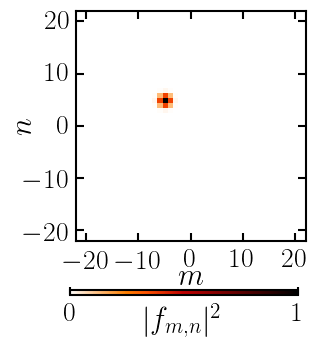

In [10]:
f, ax = plt.subplots(figsize=(3.5, 3.5))
im = ax[:imshow](reshape(abs2(P), sp.N,sp.N)[st:en,st:en], origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[-edge, edge, -edge, edge],
                 vmin=0, vmax=1)

ax[:set_ylabel](L"$n$", labelpad=-10)
ax[:set_xlabel](L"$m$", labelpad=-6)
    
cbaxes = f[:add_axes]([0.25, 0.08, 0.65, 0.015])
cbar = f[:colorbar](im, cax=cbaxes, orientation="horizontal")
cbar[:set_ticks]([0, 1])
cbar[:set_ticklabels]([L"$0$", L"$1$"])
cbar[:set_label](L"$|f_{m,n}|^2$", rotation=0, labelpad=-15, y=0.5)
cbar[:solids][:set_edgecolor]("face")

plt.close(f)

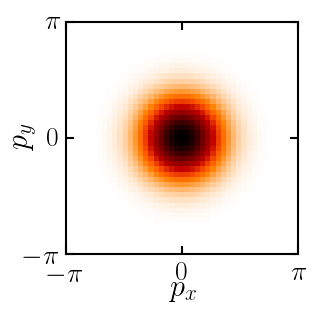

In [11]:
f, ax = plt.subplots(figsize=(3.5, 3.5))
im = ax[:imshow](abs2(fftshift(fft(reshape(P, sp.N,sp.N)))),
                 origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                 extent=[-π, π, -π, π])
ax[:set_xticks]([-π,0,π])
ax[:set_yticks]([-π,0,π])
ax[:set_xticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
ax[:set_yticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
ax[:set_xlabel](L"$p_x$", labelpad=-4)
ax[:set_ylabel](L"$p_y$", labelpad=-10)

plt.close(f)

In [12]:
extrema(abs2(fftshift(fft(reshape(P, sp.N,sp.N)))))

(1.8410605787842223e-6,39.478418449286536)

In [31]:
N = 45
α = 1/11
κ = 0.02

M = spzeros(Complex{Float64}, N^2,N^2)
BP.buildham_exact!(M, N,α,κ)
vert45 = real(eigs(M, nev=30, which=:SR, ritzvec=false)[1])

30-element Array{Float64,1}:
 -3.43488
 -3.40103
 -3.36718
 -3.33333
 -3.29948
 -3.26563
 -3.23179
 -3.19793
 -3.1641 
 -3.13023
 -3.0964 
 -3.06255
 -3.02869
  ⋮      
 -2.82563
 -2.79177
 -2.75792
 -2.72409
 -2.69025
 -2.6564 
 -2.62255
 -2.5887 
 -2.55486
 -2.52102
 -2.48718
 -2.45333

In [14]:
N = 11
α = 1/7
κ = 0.2

M = spzeros(Complex{Float64}, N^2,N^2)
BP.buildham_exact!(M, N,α,κ)
vert11 = real(eigs(M, nev=12, which=:SR, ritzvec=false)[1]);

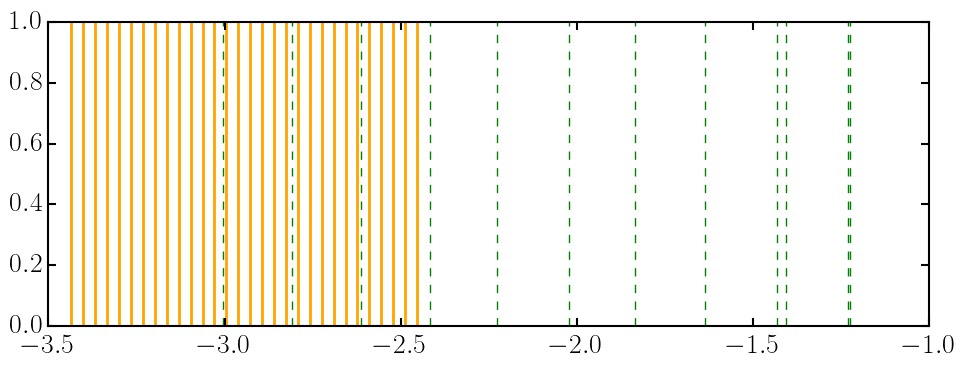

In [30]:
f, ax = plt.subplots(figsize=(10, 4))

for ω in vert45
    ax[:axvline](x = ω, color="orange", linewidth="2")
end 

for ω in vert11
    ax[:axvline](x = ω, color="green", ls="dashed")
end 

#ax[:set_xlim](-3.5,-3)


plt.close(f)

In [16]:
sp.νs[100]

-3.3989795918367345

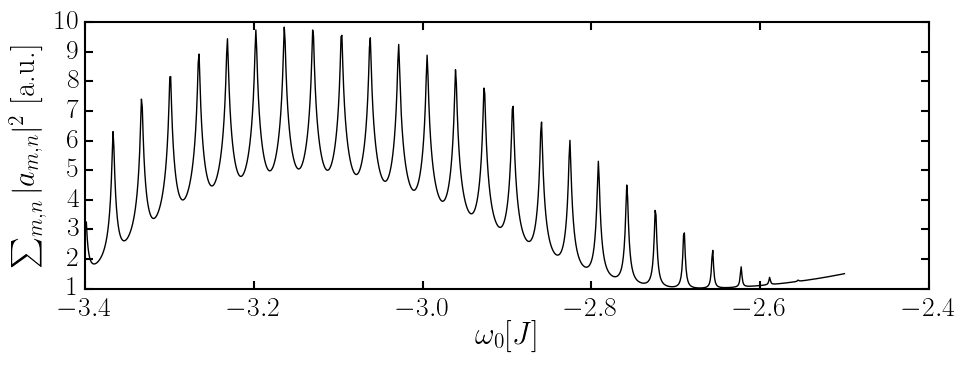

In [17]:
#plot spectrum
f, ax = plt.subplots(figsize=(10, 4))
ax[:plot](sp.νs[100:end],log(sp.intensity[100:end]),"k") 
#ax[:set_xlim](-3.4,sp.νs[end])
ax[:set_xlabel](L"$\omega_0 [J]$")
ax[:set_ylabel](L"$\sum_{m,n} |a_{m,n}|^2$ [a.u.]")
f[:savefig]("spect_1.pdf")
plt.close(f)

In [18]:
sω = slider(ν[1]:0.002:ν[end], label="ω")

Slider{Float64}([Input{Float64}] -3.0,"ω",-3.0,-3.5:0.002:-2.5)

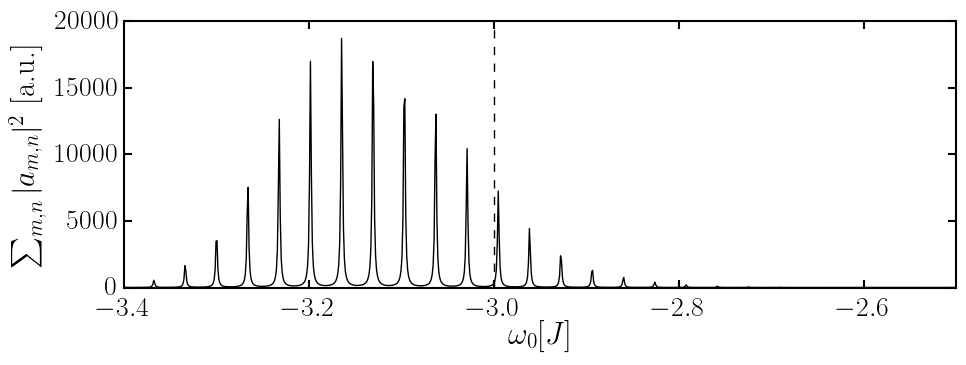

In [19]:
#plot spectrum
f1, ax1 = plt.subplots(figsize=(10, 4))
lift(ω -> withfig(()->begin
    ax1[:cla]()
    ax1[:plot](sp.νs,sp.intensity,"k") 
    ax1[:axvline](x=ω,color="k",ls="dashed")
    ax1[:set_xlim](-3.4,sp.νs[end])
    ax1[:set_xlabel](L"$\omega_0 [J]$")
    ax1[:set_ylabel](L"$\sum_{m,n} |a_{m,n}|^2$ [a.u.]")
    end,f1,clear=false), sω)

In [20]:
display(sω)

Slider{Float64}([Input{Float64}] -3.0,"ω",-3.0,-3.5:0.002:-2.5)

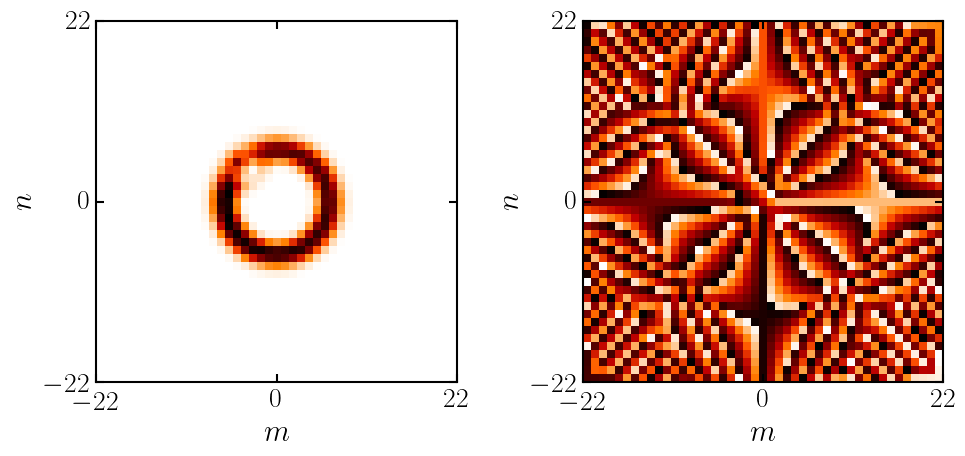

In [21]:
#plot w.f. in real space
f2, axes = plt.subplots(1,2, figsize=(10, 5))
lift(ω -> withfig(()->begin
    axes[1][:cla]()
    axes[2][:cla]()
    axes[1][:imshow](abs2(reshape(BP.getstate(sp, ω), sp.N,sp.N))[st:en,st:en],
                     origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                     extent=[-edge, edge, -edge, edge])
    axes[2][:imshow](angle(reshape(BP.getstate(sp, ω), sp.N,sp.N))[st:en,st:en],
                     origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                     extent=[-edge, edge, -edge, edge])
    for ax in axes
        ax[:set_xlabel](L"$m$")
        ax[:set_ylabel](L"$n$")
        ax[:set_xticks]([-edge,0, edge])
        ax[:set_yticks]([-edge,0, edge])
    end
    end,f2,clear=false), sω)

In [22]:
display(sω)

Slider{Float64}([Input{Float64}] -3.0,"ω",-3.0,-3.5:0.002:-2.5)

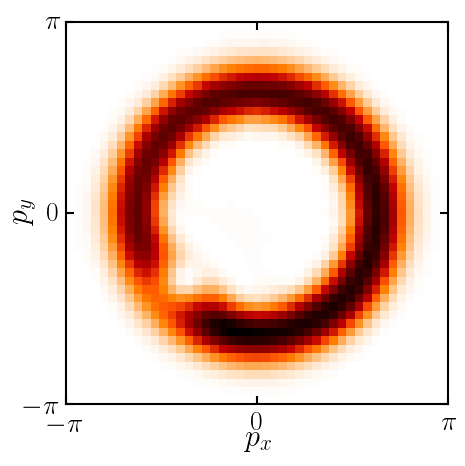

In [23]:
#plot w.f. in mom space
f3, ax3 = plt.subplots(figsize=(5, 5))
lift(ω -> withfig(()->begin
    ax3[:cla]()
    ax3[:imshow](abs2(fftshift(fft(reshape(BP.getstate(sp, ω), sp.N,sp.N)))),
                     origin="upper", ColorMap("gist_heat_r"), interpolation="none",
                     extent=[-π, π, -π, π])
    ax3[:set_xticks]([-π,0,π])
    ax3[:set_yticks]([-π,0,π])
    ax3[:set_xticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
    ax3[:set_yticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
    ax3[:set_xlabel](L"$p_x$", labelpad=-4)
    ax3[:set_ylabel](L"$p_y$", labelpad=-10)
    end,f3,clear=false), sω)

In [24]:
k = linspace(-π, π, 200);

In [32]:
X = reshape(BP.getstate(sp, -2.45333), sp.N,sp.N);

In [33]:
extrema(abs2(BP.myfft2(X, k,k)))

(1.7543440043687877e-9,108.68641987315165)

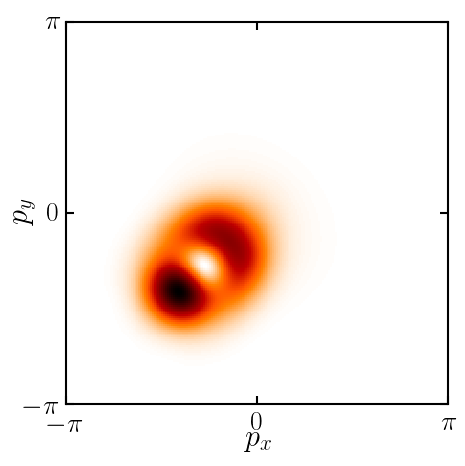

In [35]:
#plot w.f. in mom space
f, ax = plt.subplots(figsize=(5, 5))
ax[:imshow](abs2(BP.myfft2(X, k,k)),
            origin="upper", ColorMap("gist_heat_r"), interpolation="none",
            extent=[-π, π, -π, π])
ax[:set_xticks]([-π,0,π])
ax[:set_yticks]([-π,0,π])
ax[:set_xticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
ax[:set_yticklabels]([L"$-\pi$",L"$0$",L"$\pi$"])
ax[:set_xlabel](L"$p_x$", labelpad=-4)
ax[:set_ylabel](L"$p_y$", labelpad=-10)

plt.close(f)

In [28]:
## function extractpath(l1::Int,l2::Int,c1::Int,c2::Int, M::Matrix{Float64})
##     path=Float64[]
##     append!(path, M[l1:l2,c1])
##     append!(path, vec(M[l2,c1:c2])[2:end])
##     append!(path, M[l2:-1:l1,c2][2:end])
##     append!(path, vec(M[l1,c2:-1:c1])[2:end-1])
##     path
## end